# Regression Matrix :- MSE, MAE, R2 score and adjusted R2 Score

In [11]:
import matplotlib as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("placement.csv")

In [15]:
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


Text(0, 0.5, 'package in LPA ')

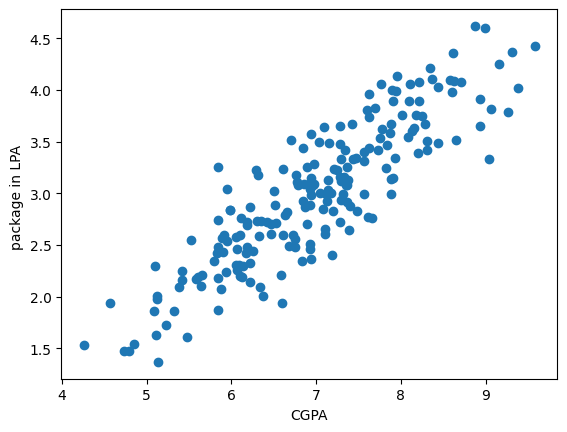

In [21]:
plt.scatter(df['cgpa'],df['package']) # Plot CGPA on X axis and Package on Y axis as dots.
plt.xlabel("CGPA")
plt.ylabel("package in LPA ")

In [29]:
X = df.iloc[:,0:1] # select first column as input
Y = df.iloc[:,-1] # op data 

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size =0.2,random_state=2)

In [33]:
from sklearn.linear_model import LinearRegression

In [35]:
lr = LinearRegression()

In [37]:
lr.fit(X_train,Y_train) # training data fit means finding relation bw x and y

LinearRegression()

Text(0, 0.5, 'package in LPA ')

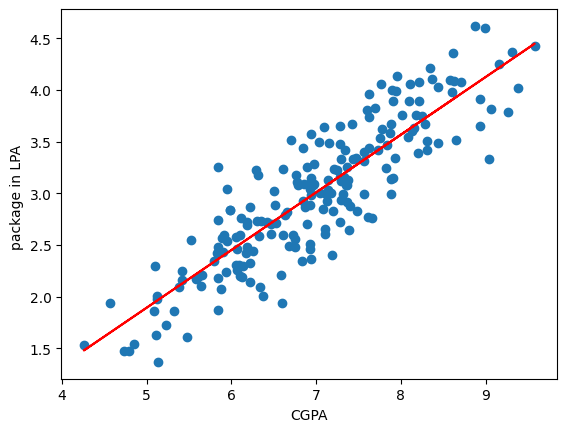

In [41]:
plt.scatter(df['cgpa'],df['package'])# Plot CGPA on X axis and Package on Y axis as dots.
plt.plot(X_train, lr.predict(X_train),color = 'red')
plt.xlabel("CGPA")
plt.ylabel("package in LPA ")

In [55]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [65]:
y_pred = lr.predict(X_test)

In [67]:
Y_test.values

array([4.1 , 3.49, 2.08, 2.33, 1.94, 1.48, 1.86, 3.09, 4.21, 2.87, 3.65,
       4.  , 2.89, 2.6 , 2.99, 3.25, 1.86, 3.67, 2.37, 3.42, 2.48, 3.65,
       2.6 , 2.83, 4.08, 2.56, 3.58, 3.81, 4.09, 2.01, 3.63, 2.92, 3.51,
       1.94, 2.21, 3.34, 3.34, 3.23, 2.01, 2.61])

In [69]:
print("MAE", mean_absolute_error(Y_test, y_pred))

MAE 0.2884710931878175


# so the model makes mistake of 0.28 LPA's mistake

In [80]:
print("MSE", mean_squared_error(Y_test, y_pred))

MSE 0.12129235313495527


In [85]:
print("MSE", np.sqrt(mean_squared_error(Y_test, y_pred)))

MSE 0.34827051717731616


In [89]:
print("R2_score", r2_score(Y_test, y_pred))
r2 = r2_score(Y_test, y_pred)

R2_score 0.780730147510384


In [97]:
X_test.shape

(40, 1)

# Formulla = 1 - ((1-r2)(n-1)) / n-1-k
# where n = no. of rows and k = no. of indepedent cols

In [105]:
# adjusted r2 score 
1 - (((1-r2)*(40-1)/(40-1-1)))

0.7749598882343415

In [107]:
# let's add a new random column

In [109]:
new_df1 = df.copy()
new_df1['random_feature'] = np.random.random(200)

new_df1 = new_df1[['cgpa','random_feature','package']]
new_df1.head()

,cgpa,random_feature,package
0,6.89,0.599329,3.26
1,5.12,0.895113,1.98
2,7.82,0.998955,3.25
3,7.42,0.852645,3.67
4,6.94,0.133693,3.57


Text(0, 0.5, 'Package(in lpa)')

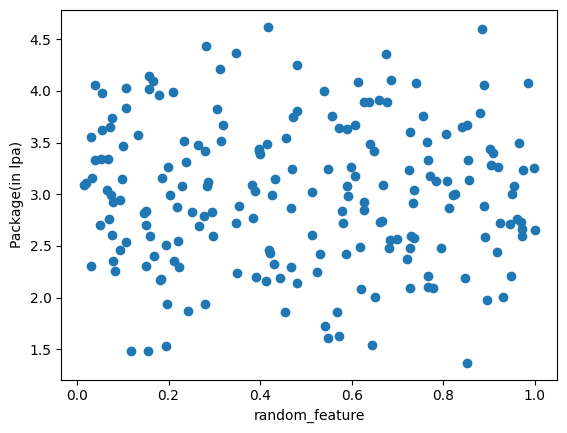

In [111]:
plt.scatter(new_df1['random_feature'],new_df1['package'])
plt.xlabel('random_feature')
plt.ylabel('Package(in lpa)')

In [113]:
X = new_df1.iloc[:,0:2]
y = new_df1.iloc[:,-1]

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [117]:
lr = LinearRegression()

In [119]:
lr.fit(X_train,y_train)

LinearRegression()

In [121]:
y_pred = lr.predict(X_test)

In [123]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.7806534536994122


In [125]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7687968836291101

In [127]:
new_df2 = df.copy()

new_df2['iq'] = new_df2['package'] + (np.random.randint(-12,12,200)/10)

new_df2 = new_df2[['cgpa','iq','package']]

In [129]:
new_df2.sample(5)

,cgpa,iq,package
199,6.22,2.03,2.33
81,6.10,1.70,2.20
119,7.39,2.95,2.65
133,6.05,2.68,2.58
190,6.19,2.09,2.69


Text(0, 0.5, 'Package(in lpa)')

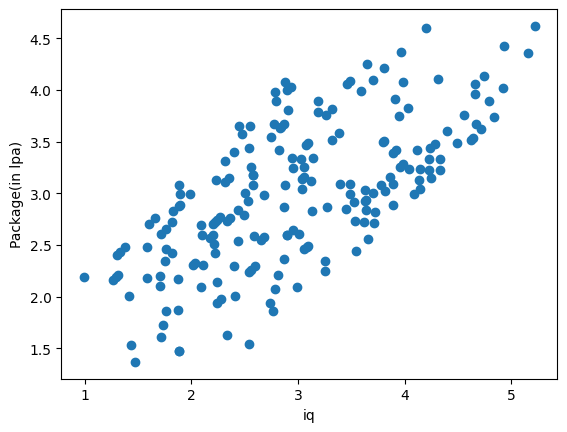

In [131]:
plt.scatter(new_df2['iq'],new_df2['package'])
plt.xlabel('iq')
plt.ylabel('Package(in lpa)')

In [133]:
np.random.randint(-100,100)

-43

In [135]:
X = new_df2.iloc[:,0:2]
y = new_df2.iloc[:,-1]

In [137]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [139]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [141]:
print("R2 score",r2_score(y_test,y_pred))
r2 = r2_score(y_test,y_pred)

R2 score 0.8097692226505895


In [143]:
1 - ((1-r2)*(40-1)/(40-1-2))

0.7994864779289997